In [2]:
import librosa
import numpy as np

In [3]:
filename = "./voice.wav"

y, sr = librosa.load(filename)

In [4]:
!ffprobe -i voice.wav

'ffprobe'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [41]:
16000 * 16

256000

In [38]:
!file "./voice.wav"

/bin/sh: 1: file: not found


In [5]:
print(y)
print(y.shape)
print(sr)

[-2.6416773e-04 -8.7711713e-05  7.4029871e-05 ... -4.7190872e-04
 -7.1896898e-04  0.0000000e+00]
(67451,)
22050


In [6]:
import IPython.display as ipd
ipd.Audio(filename) # load a local WAV file

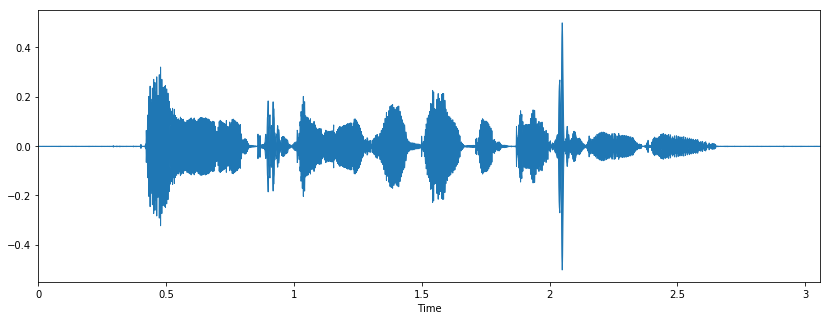

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [8]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

ipd.Audio(x, rate=sr) # load a NumPy array

In [9]:
D = librosa.stft(y)
print(D)

D_mag = np.abs(D)
print(D_mag)
print(D_mag.shape)

magnitude, phase = librosa.magphase(D)

print(magnitude)
print(magnitude.shape)

print(magnitude-D_mag)


[[-2.0271669e-01+0.0000000e+00j -2.2335482e-01+0.0000000e+00j
  -2.0624745e-01+0.0000000e+00j ... -2.0536214e-01+0.0000000e+00j
  -1.8242790e-01+0.0000000e+00j -2.3943342e-01+0.0000000e+00j]
 [ 9.1300845e-02+0.0000000e+00j  1.1643804e-01-2.2544067e-02j
   1.2114920e-01+3.9568920e-02j ...  1.4364478e-01+1.0614019e-02j
   5.6337316e-02+1.5565794e-02j  1.2117173e-01-7.1593568e-02j]
 [-2.6720785e-02+0.0000000e+00j  6.8106810e-03+5.4051723e-02j
   2.8513984e-03-3.2043349e-02j ... -6.4515918e-02-3.1750415e-02j
   3.9262515e-02-1.0073975e-03j  1.2647596e-02+5.2239187e-02j]
 ...
 [ 3.0625091e-05+0.0000000e+00j -1.5313077e-05+3.8300638e-09j
   1.5027127e-10-3.1777798e-09j ...  3.2753153e-10+1.1841784e-09j
   2.4383682e-05-2.6246200e-05j -4.0960076e-04+4.4092195e-04j]
 [-3.0623272e-05+0.0000000e+00j -1.1120203e-09+1.5309830e-05j
  -1.5343739e-09+2.1170277e-09j ...  1.4012157e-09-6.2863231e-10j
   3.2840220e-05-1.4316929e-05j -2.4049824e-04-5.5167143e-04j]
 [ 3.0622934e-05+0.0000000e+00j  1.53131

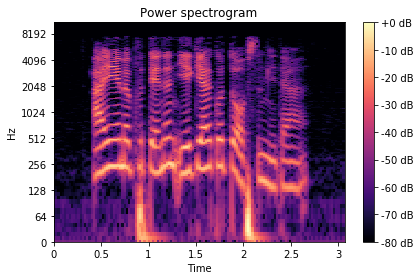

In [10]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

(128, 132)


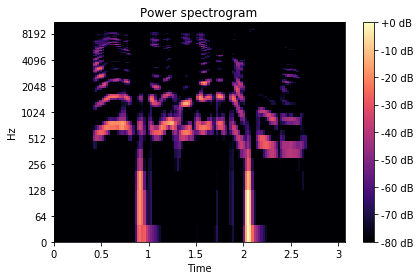

In [11]:
mel_s = librosa.feature.melspectrogram(y=y, sr=sr)
print(mel_s.shape)

import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(mel_s,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [12]:
67451 / 512

131.740234375

(40, 132)


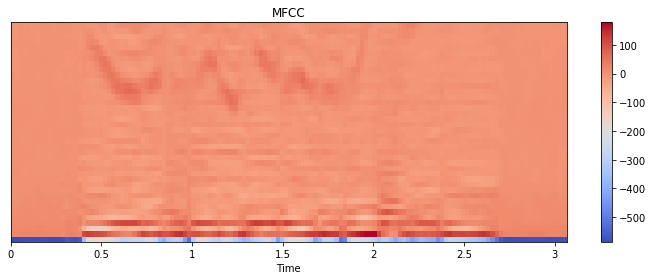

In [13]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print(mfccs.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

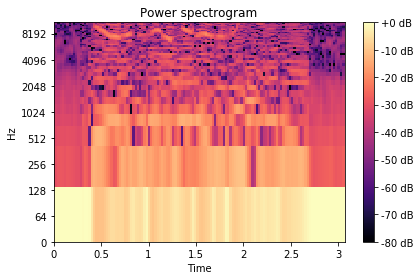

In [14]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(mfccs,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()